# Interpretation for Testpulse to Charge in electrons
## Based on data from [ThresholdCalib_2025-12-09_19-06-58.pdf](../plots/ThresholdCalib_2025-12-09_19-06-58.pdf)

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [98]:
#Model for linear fit
def linear_mod(x, co, m):
    return co + m*x

[1872.65917603 2247.19101124 2621.72284644 2996.25468165 3370.78651685
 3745.31835206 4119.85018727 4494.38202247 4868.91385768 5243.44569288
 5617.97752809 5992.5093633 ]


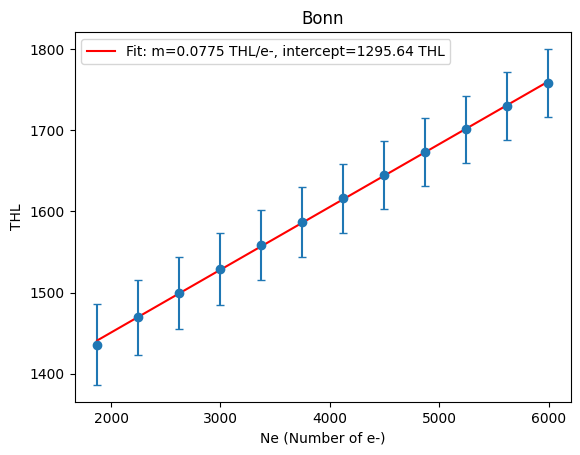

In [99]:
th_mean = np.array([1435.83, 1469.23, 1499.77, 1529.00, 1558.50, 1587.02, 1616.27, 1644.79, 1673.51, 1701.03, 1730.30, 1758.26])
th_er = np.array([49.80, 46.56, 44.58, 43.94, 43.20, 42.68, 42.40, 42.19, 42.07, 41.87, 41.84, 42.14])
vtpC = 100
ntp = 12
vtpF_step = 2.5e-3 #Step of vtpF DAC #! This is 2.5 mV as per Bonn, 0.5 mV as per our observation
vtpF = 240 + (100//ntp)*np.arange(ntp)
vtp = (vtpF - vtpC*2)*vtpF_step #Each VtpF DAC in mV
c = 3e-15 #Test capacitance in Farads
e = 1.602e-19 #Electron charge in Coloumb
Ne_vtp = vtp*c/e #Number of electrons at each vtp
print(Ne_vtp)

poptB,pcovB = curve_fit(linear_mod, Ne_vtp, th_mean, sigma=th_er)
plt.errorbar(Ne_vtp, th_mean, th_er, fmt='o', capsize=3)
plt.plot(Ne_vtp, linear_mod(Ne_vtp, *poptB), c='r', label='Fit: m=%.4f THL/e-, intercept=%.2f THL'%(poptB[1],poptB[0]))
plt.title('Bonn'); plt.xlabel('Ne (Number of e-)'); plt.ylabel('THL')
plt.legend()

In [100]:
#THL to electrons conversion using Bonn fit
thl = 1425
ne_est = (thl - poptB[0])/poptB[1]
print('For THL = %d, estimated number of electrons is %.2f e-'%(thl, ne_est))

#electron to THL conversion using Bonn fit
Ne = 1000
thl_est = linear_mod(Ne, *poptB)
print('For %d electrons, estimated THL is %.2f THL'%(Ne, thl_est))

For THL = 1425, estimated number of electrons is 1669.32 e-
For 1000 electrons, estimated THL is 1373.13 THL


In [101]:
#Compute Test pulse amplitude for required number of electrons from Bonn fit

Ne = 200
Ne = 1000
vtp_V_req = Ne*e/c #in Volts
vtpF_step = 2.5e-3 #Step of vtpF DAC #! This is 2.5 mV as per Documentaion
vtpF_abs = vtp_V_req/vtpF_step
vtpC = 100 #! Change this as per DAC setting
vtpF = vtpF_abs + vtpC*2
print('For %d electrons, required VtpF DAC is %.2f for VtpC DAC %d'%(Ne, vtpF, vtpC))
print('Expected threshold from Bonn fit is %.2f THL'%(linear_mod(Ne, *poptB)))

For 1000 electrons, required VtpF DAC is 221.36 for VtpC DAC 100
Expected threshold from Bonn fit is 1373.13 THL


# Alternate interpretation with 2.5 V per TP DAC step

[ 374.53183521  449.43820225  524.34456929  599.25093633  674.15730337
  749.06367041  823.97003745  898.87640449  973.78277154 1048.68913858
 1123.59550562 1198.50187266]


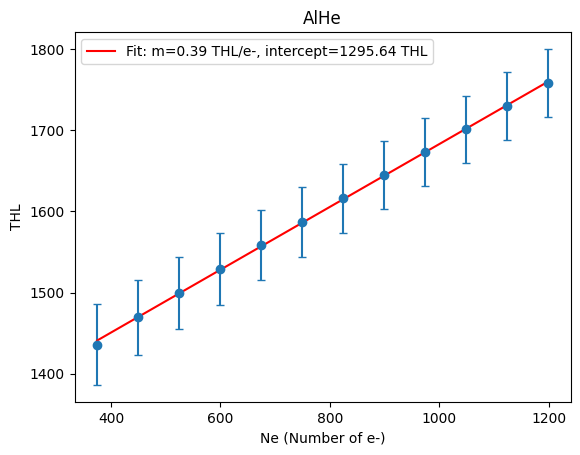

In [107]:
# The old data set with ntp = 4 
# th_mean = np.array([1433.75, 1527.53, 1618.50, 1706.54])
# th_er = np.array([45.54, 44.23, 43.51, 43.03])
vtpC = 100
ntp = 12
vtpF_step = 0.5e-3 #Step of vtpF DAC #! This is 2.5 mV as per Bonn, 0.5 mV as per our observation
vtpF = 240 + (100//ntp)*np.arange(ntp)
vtp = (vtpF - vtpC*2)*vtpF_step #Each VtpF DAC in mV
c = 3e-15 #Test capacitance in Farads
e = 1.602e-19 #Electron charge in Coloumb
Ne_vtp = vtp*c/e #Number of electrons at each vtp
print(Ne_vtp)

poptAH,pcovAH = curve_fit(linear_mod, Ne_vtp, th_mean, sigma=th_er)
plt.errorbar(Ne_vtp, th_mean, th_er, fmt='o', capsize=3)
plt.plot(Ne_vtp, linear_mod(Ne_vtp, *poptAH), c='r', label='Fit: m=%.2f THL/e-, intercept=%.2f THL'%(poptAH[1],poptAH[0]))
plt.title('AlHe'); plt.xlabel('Ne (Number of e-)'); plt.ylabel('THL')
plt.legend()

# Estimate DAC values for Scans based on physical units (electrons, voltages, etc.)
## VtpF for required number of electrons Ne
## VtpF range for rqeuired Ne range to use in TOT calibration
## THL to electron conversion and vice-versa with AlHe VtpF DAC assumption 0.5 mV

In [108]:
#Compute Test pulse amplitude for required number of electrons

Ne = 200
Ne = 1000
vtp_V_req = Ne*e/c #in Volts
vtpF_step = 0.5e-3 #Step of vtpF DAC #! This is 0.5 mV as per our observation
vtpF_abs = vtp_V_req/vtpF_step
vtpC = 100 #! Change this as per DAC setting
vtpF = vtpF_abs + vtpC*2
print('For %d electrons, required VtpF DAC is %.2f for VtpC DAC %d'%(Ne, vtpF, vtpC))
print('Expected threshold from HeAl fit is %.2f THL'%(linear_mod(Ne, *poptAH)))

For 1000 electrons, required VtpF DAC is 306.80 for VtpC DAC 100
Expected threshold from HeAl fit is 1683.11 THL


In [ ]:
#Estimate VtpF ranges for TOT calibration
vtpC = 100
Ne_min = 200
Ne_max = 4000
vtpF_step = 0.5e-3 #Step of vtpF
vtp_min = Ne_min*e/c #in Volts
vtp_max = Ne_max*e/c #in Volts
vtpF_min = vtp_min/vtpF_step + vtpC*2
vtpF_max = vtp_max/vtpF_step + vtpC*2
print('For TOT calibration from %d to %d electrons, VtpF DAC range is %.2f to %.2f for VtpC DAC %d'%(Ne_min, Ne_max, vtpF_min, vtpF_max, vtpC))
print('Expected threshold from HeAl fit is %.2f to %.2f THL'%(linear_mod(Ne_min, *poptAH), linear_mod(Ne_max, *poptAH)))

For TOT calibration from 200 to 4000 electrons, VtpF DAC range is 221.36 to 627.20 for VtpC DAC 100
Expected threshold from HeAl fit is 1373.13 to 2845.51 THL


In [ ]:
#THL to electrons conversion using AlHe fit
thl = 1343
ne_est = (thl - poptAH[0])/poptAH[1]
print('For THL = %d, estimated number of electrons is %.2f e-'%(thl, ne_est))

#electron to THL conversion using AlHe fit
Ne = 1000
thl_est = linear_mod(Ne, *popt)
print('For %d electrons, estimated THL is %.2f THL'%(Ne, thl_est))

For THL = 1343, estimated number of electrons is 122.23 e-
For 1000 electrons, estimated THL is 1683.11 THL
